In [105]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from random import sample

#Preprocess

INF = int(1e10)
n = 1000

gen = [] #Current generation of permutations

In [106]:
#functions

def cost(a):
    #returns the cost of the permutation a
    #Lower the cost, better
    fit = int(0)
    d1 = [0]*(2*n) #Diagonals 1
    d2 = [0]*(2*n) #Diagonals 2
    
    for x in range(n):
        d1[n-1+(a[x]-x)]+=1
        d2[x+a[x]]+=1
    
    for i in range(2*n):
        fit += int((d1[i]*(d1[i]-1))/2)
        fit += int((d2[i]*(d2[i]-1))/2)
    
    return fit

def randomPermutation():
    a = [i for i in range(n)]
    random.shuffle(a)
    return a

def Reverse(lst): 
    return [ele for ele in reversed(lst)] 

def Crossover(x, y):
    i = random.choice(range(n))
    j = random.choice(range(n))
    mark = [0]*n

    newx = [0]*n
    
    for k in range(i, j+1):
        newx[k] = x[k]
        mark[x[k]] = 1;

        
    pold = (j+1)%n
    pnew = pold
    
    for u in range(n):
        if mark[y[pold]] == 1:
            pold = pold+1
            pold = pold%n
            continue
        
        if newx[pnew] == True:
            break;
        
        newx[pnew] = y[pold]
        mark[y[pold]] = 1
        pold, pnew = pold+1, pnew+1
        pold, pnew = pold%n, pnew%n
        
    return newx

def makeGrid(a):
    grid = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            grid[i][j] = 240-50*((i+j)%2)
    for i in range(n):
        grid[i][a[i]] = 1
    
    return grid

In [110]:
#Crossover and Mutations
def Evolve(nGen):
    global m, gen
    mRate = 1 #Rate of Mutation

    for _ in range(nGen):
        #if _%50==0:
        #    print("I: ", _)

        newgen = []        
        for u in range(m):
            x = random.choice(gen)
            y = random.choice(gen)
            newgen.append(Crossover(x, y))

        tmp = int(mRate*100)
        for x in gen:
            chance = random.choice(range(101))
            if chance >= tmp:
                continue

            i = random.choice(range(n))
            j = random.choice(range(n))
            newy = x[:]
            newy[i], newy[j] = newy[j], newy[i]
            newgen.append(newy)

        for x in newgen:
            gen.append(x)

        gen = sorted(gen, key = cost)
        gen = gen[:m]
        if _%20 == 0:
            print("I: ", _, "cost:", cost(gen[0]))
        if (cost(gen[0]) == 0):
            print("FOUNDED:", gen[0])
            return


#print(cost(gen[0]))
#print(gen[0])

In [116]:
levels = 100
length = 10

Gens = [[]]*levels

for i in range(length):
    #Generating the primary generation
    m = 100
    gen = []
    for _ in range(m):
        gen.append(randomPermutation())
    len(gen)
    #Settings
    m = 20
    Evolve(20)
    Gens[0] += gen
Gens[0]

for i in range(1, levels):
    print("AT LEVEL:", i)
    for j in range(length-(i//20)):
        m = 100
        gen = sample(Gens[i-1], m)
        m = 20
        Evolve(20)
        Gens[i] += gen

I:  0 cost: 599
I:  0 cost: 594
I:  0 cost: 599
I:  0 cost: 590
I:  0 cost: 596
I:  0 cost: 586
I:  0 cost: 599
I:  0 cost: 607
I:  0 cost: 604
I:  0 cost: 604
AT LEVEL: 1
I:  0 cost: 546
I:  0 cost: 505
I:  0 cost: 484
I:  0 cost: 461
I:  0 cost: 437
I:  0 cost: 418
I:  0 cost: 402
I:  0 cost: 390
I:  0 cost: 374
I:  0 cost: 360
AT LEVEL: 2
I:  0 cost: 347
I:  0 cost: 334
I:  0 cost: 324
I:  0 cost: 309
I:  0 cost: 299
I:  0 cost: 289
I:  0 cost: 275
I:  0 cost: 267
I:  0 cost: 259
I:  0 cost: 253
AT LEVEL: 3
I:  0 cost: 246
I:  0 cost: 239
I:  0 cost: 230
I:  0 cost: 223
I:  0 cost: 221
I:  0 cost: 217
I:  0 cost: 212
I:  0 cost: 207
I:  0 cost: 203
I:  0 cost: 196
AT LEVEL: 4
I:  0 cost: 191
I:  0 cost: 186
I:  0 cost: 183
I:  0 cost: 180
I:  0 cost: 174
I:  0 cost: 170
I:  0 cost: 167
I:  0 cost: 163
I:  0 cost: 159
I:  0 cost: 153
AT LEVEL: 5
I:  0 cost: 152
I:  0 cost: 149
I:  0 cost: 147
I:  0 cost: 145
I:  0 cost: 142
I:  0 cost: 141
I:  0 cost: 139
I:  0 cost: 137
I:  0 cost: 

KeyboardInterrupt: 

In [98]:
len(Gens[0])

4000

In [117]:
gen[0] = [944, 349, 448, 836, 328, 493, 341, 861, 409, 307, 848, 129, 860, 703, 468, 87, 171, 295, 352, 223, 643, 303, 558, 310, 332, 284, 420, 278, 531, 982, 540, 70, 348, 793, 710, 527, 358, 151, 858, 696, 512, 294, 452, 578, 0, 481, 116, 230, 375, 330, 434, 756, 465, 829, 697, 917, 124, 296, 271, 170, 665, 371, 728, 494, 17, 596, 766, 741, 822, 758, 383, 769, 993, 393, 616, 372, 401, 118, 264, 356, 763, 60, 281, 530, 67, 213, 301, 988, 581, 518, 476, 731, 678, 608, 270, 139, 875, 64, 416, 589, 652, 244, 160, 684, 427, 672, 131, 956, 522, 784, 700, 391, 32, 832, 618, 138, 564, 797, 632, 159, 304, 133, 735, 549, 177, 168, 547, 298, 746, 689, 825, 739, 859, 634, 521, 47, 163, 148, 681, 18, 451, 293, 882, 949, 483, 972, 165, 724, 400, 386, 279, 55, 593, 238, 444, 926, 776, 607, 405, 321, 620, 614, 658, 323, 365, 495, 591, 221, 443, 707, 752, 344, 918, 650, 550, 638, 645, 677, 65, 289, 679, 156, 819, 922, 28, 15, 302, 312, 704, 430, 974, 659, 893, 35, 880, 227, 357, 259, 583, 204, 800, 532, 640, 155, 773, 587, 166, 351, 570, 513, 94, 844, 960, 162, 379, 423, 253, 941, 630, 68, 106, 471, 100, 976, 835, 888, 442, 781, 137, 669, 398, 668, 603, 460, 182, 49, 212, 957, 338, 329, 701, 242, 921, 662, 184, 815, 713, 709, 265, 637, 505, 381, 951, 455, 152, 787, 101, 287, 498, 119, 755, 999, 257, 721, 403, 806, 978, 529, 475, 847, 563, 722, 80, 266, 830, 246, 123, 948, 863, 600, 373, 134, 428, 526, 502, 919, 24, 601, 322, 261, 501, 736, 314, 881, 692, 973, 804, 492, 846, 484, 174, 854, 930, 533, 399, 789, 22, 180, 732, 788, 396, 857, 345, 908, 390, 757, 833, 720, 566, 125, 220, 426, 588, 552, 395, 254, 855, 109, 46, 31, 619, 682, 12, 609, 691, 114, 410, 488, 977, 953, 74, 989, 851, 394, 889, 624, 990, 83, 3, 871, 839, 222, 127, 748, 592, 217, 562, 361, 209, 548, 794, 924, 764, 646, 719, 723, 654, 767, 107, 970, 714, 590, 489, 25, 778, 903, 799, 424, 869, 560, 245, 347, 183, 461, 524, 311, 907, 73, 779, 913, 586, 661, 831, 485, 509, 952, 147, 44, 113, 216, 876, 747, 188, 595, 931, 472, 673, 66, 251, 276, 490, 577, 761, 963, 536, 39, 353, 23, 751, 942, 339, 947, 56, 186, 154, 791, 110, 759, 369, 899, 333, 996, 185, 805, 169, 211, 243, 955, 267, 161, 231, 777, 576, 57, 192, 13, 823, 228, 11, 901, 77, 768, 553, 542, 38, 226, 864, 810, 315, 687, 41, 144, 85, 297, 938, 534, 808, 515, 740, 925, 457, 809, 559, 447, 36, 363, 121, 867, 388, 355, 935, 896, 994, 657, 997, 20, 411, 285, 897, 417, 873, 636, 706, 48, 651, 954, 16, 132, 449, 196, 150, 193, 260, 224, 14, 438, 75, 611, 286, 939, 754, 219, 292, 71, 437, 834, 210, 407, 967, 716, 774, 1, 34, 772, 225, 249, 991, 686, 762, 53, 464, 331, 62, 320, 207, 176, 905, 247, 644, 622, 890, 934, 4, 233, 912, 86, 300, 474, 842, 164, 256, 850, 102, 958, 883, 892, 178, 648, 933, 514, 605, 852, 683, 979, 201, 30, 436, 670, 737, 173, 491, 76, 770, 343, 626, 385, 602, 878, 862, 885, 309, 473, 715, 33, 478, 93, 705, 915, 551, 664, 413, 594, 337, 456, 234, 940, 78, 904, 111, 980, 202, 733, 966, 785, 653, 418, 969, 19, 872, 255, 88, 828, 992, 108, 792, 599, 431, 807, 983, 750, 377, 698, 189, 886, 291, 421, 135, 236, 402, 466, 26, 617, 346, 179, 97, 635, 5, 487, 274, 727, 459, 981, 910, 8, 104, 606, 604, 37, 554, 408, 482, 667, 208, 142, 197, 27, 711, 538, 422, 272, 336, 946, 141, 479, 745, 853, 975, 72, 937, 964, 21, 58, 796, 814, 9, 597, 612, 790, 203, 950, 803, 623, 506, 327, 54, 288, 504, 241, 900, 69, 268, 568, 765, 122, 503, 821, 240, 543, 439, 392, 2, 647, 51, 95, 909, 693, 429, 194, 326, 84, 269, 708, 480, 517, 368, 571, 7, 610, 675, 580, 923, 214, 555, 316, 998, 895, 199, 936, 827, 382, 615, 838, 50, 299, 342, 374, 771, 42, 232, 837, 496, 802, 884, 985, 112, 628, 585, 218, 868, 366, 877, 694, 350, 282, 198, 175, 894, 130, 340, 364, 738, 435, 140, 205, 453, 158, 780, 598, 943, 61, 258, 262, 782, 380, 676, 273, 545, 786, 573, 354, 572, 961, 891, 229, 206, 887, 870, 290, 629, 52, 556, 856, 816, 190, 432, 579, 726, 40, 813, 986, 744, 627, 569, 305, 149, 157, 89, 516, 6, 945, 248, 239, 500, 649, 440, 968, 415, 874, 523, 462, 520, 971, 115, 987, 59, 507, 215, 136, 725, 631, 633, 63, 79, 879, 840, 335, 446, 544, 537, 812, 280, 469, 561, 702, 621, 81, 397, 824, 508, 237, 433, 641, 389, 613, 308, 666, 535, 753, 117, 412, 775, 546, 463, 798, 625, 760, 929, 200, 906, 663, 10, 195, 712, 742, 360, 29, 688, 167, 128, 717, 818, 866, 655, 477, 849, 541, 845, 574, 685, 743, 146, 43, 414, 801, 317, 370, 695, 404, 995, 511, 920, 103, 639, 567, 306, 419, 965, 497, 916, 313, 817, 362, 499, 263, 441, 324, 656, 582, 96, 674, 458, 45, 911, 841, 235, 378, 90, 384, 334, 283, 843, 91, 275, 454, 914, 82, 898, 795, 187, 519, 191, 962, 367, 671, 749, 575, 690, 98, 181, 660, 932, 528, 277, 699, 826, 902, 811, 425, 730, 470, 865, 510, 145, 584, 92, 539, 718, 486, 959, 557, 99, 172, 252, 105, 359, 467, 445, 927, 250, 319, 525, 642, 984, 928, 450, 153, 120, 734, 325, 680, 318, 406, 387, 143, 376, 565, 126, 729, 783, 820]

(<matplotlib.image.AxesImage at 0x7f740dce51f0>, (-0.5, 999.5, 999.5, -0.5))

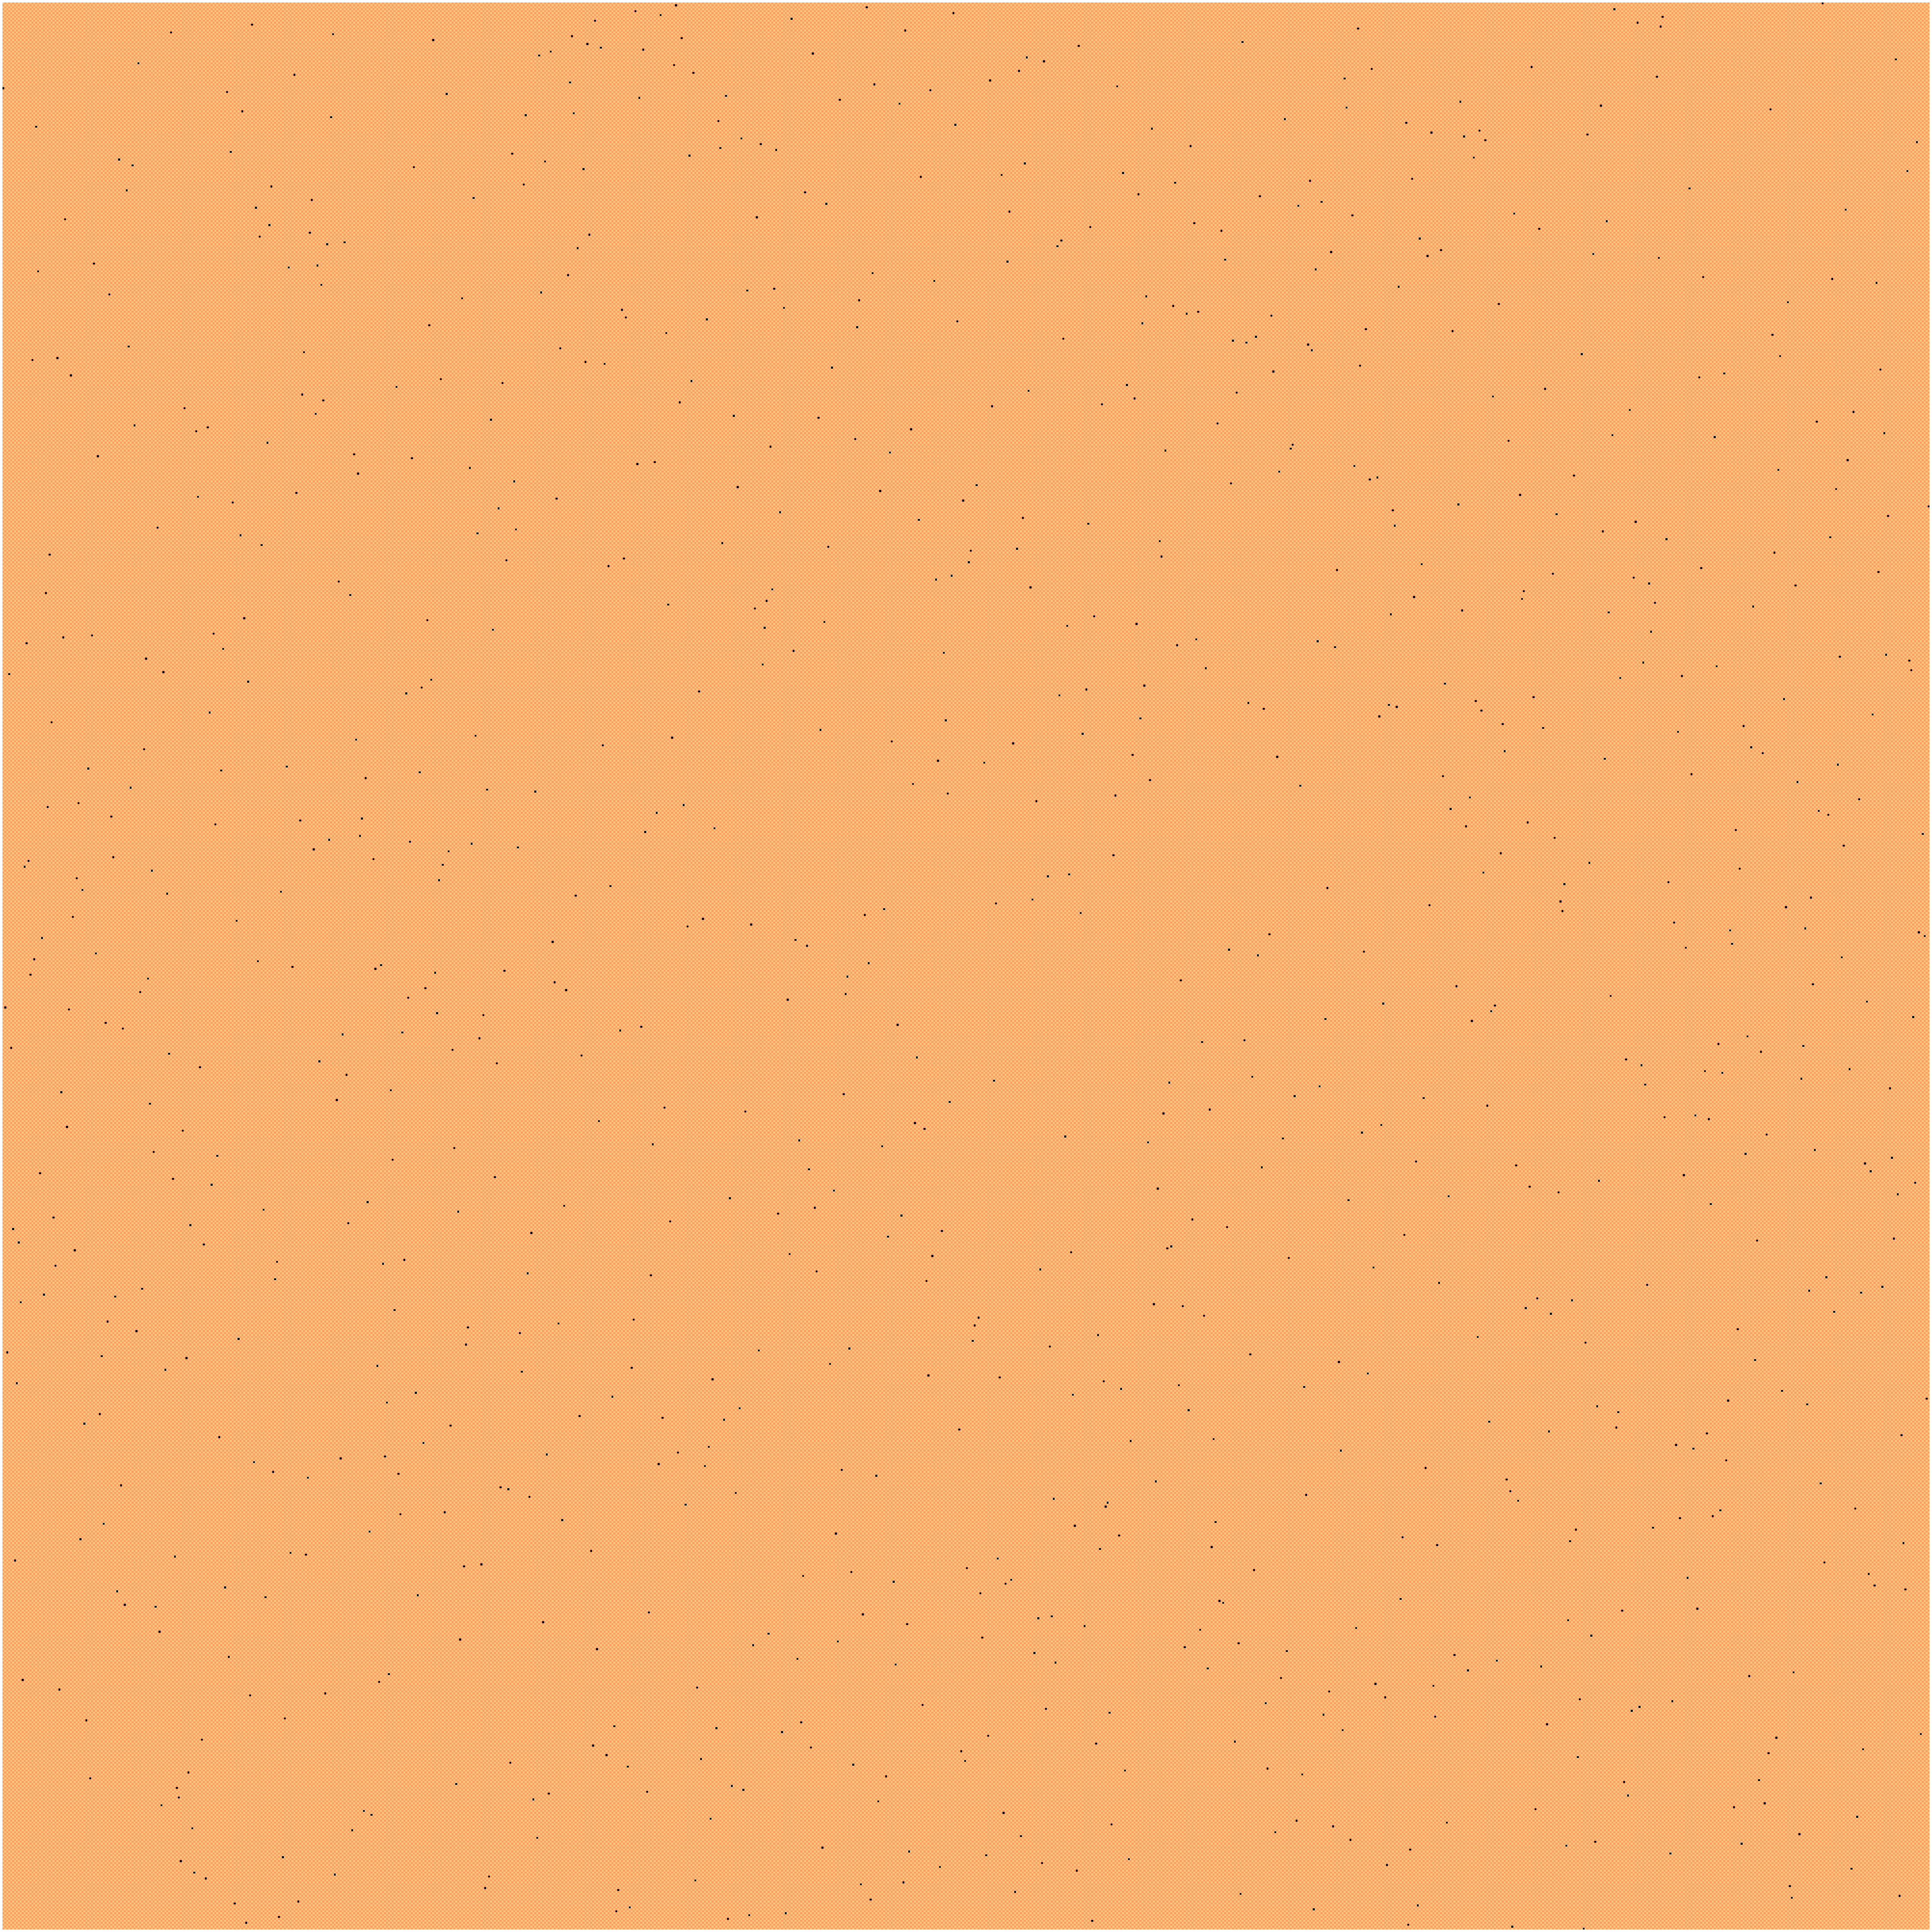

In [120]:
grid = makeGrid(gen[0])
grid = np.array(grid)
plt.figure(figsize=(100,100))
plt.imshow(grid, cmap='copper'), plt.axis('off')

In [ ]:
grid = makeGrid(gen[0])
grid = np.array(grid)
plt.figure(figsize=(10,10))
plt.imshow(grid, cmap='copper'), plt.axis('off')

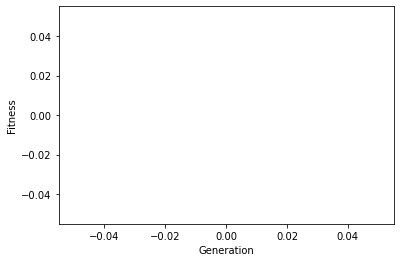

In [6]:
plt.plot(xx, yy) 

plt.xlabel('Generation') 
plt.ylabel('Fitness') 
plt.show() 

In [217]:
print(gen[0])

[28, 689, 411, 564, 149, 314, 51, 831, 78, 244, 734, 412, 640, 717, 709, 427, 341, 981, 827, 478, 275, 362, 332, 484, 439, 850, 245, 758, 475, 278, 540, 324, 346, 844, 387, 250, 993, 818, 980, 143, 525, 77, 449, 807, 618, 480, 590, 177, 750, 662, 402, 902, 558, 634, 892, 262, 191, 646, 491, 40, 400, 561, 615, 249, 771, 605, 451, 698, 955, 687, 429, 920, 607, 658, 785, 796, 933, 732, 869, 104, 516, 620, 138, 459, 654, 661, 247, 528, 392, 103, 329, 83, 207, 331, 265, 773, 64, 338, 482, 649, 616, 999, 489, 917, 704, 503, 342, 168, 849, 563, 840, 100, 179, 769, 151, 592, 406, 740, 227, 29, 565, 255, 808, 638, 248, 431, 529, 836, 53, 659, 702, 894, 781, 193, 367, 496, 923, 176, 513, 494, 580, 298, 240, 927, 759, 579, 184, 4, 316, 600, 625, 703, 721, 125, 415, 124, 733, 321, 653, 588, 210, 610, 803, 8, 617, 135, 596, 870, 424, 349, 60, 380, 694, 155, 585, 533, 140, 619, 267, 304, 930, 695, 85, 554, 774, 369, 746, 391, 442, 172, 612, 530, 44, 791, 962, 425, 651, 57, 440, 931, 61, 821, 72, 396

In [1]:
plt.figure(figsize=(30,30))
grid = makeGrid(gen[0])
grid = np.array(grid)
plt.imshow(grid, cmap='copper'), plt.axis('on')

NameError: name 'plt' is not defined